In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('pic.jpg',0) 
original = np.fft.fft2(image)
center = np.fft.fftshift(original)

In [3]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

<Figure size 2304x1728 with 0 Axes>

<Figure size 2304x1728 with 0 Axes>

(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

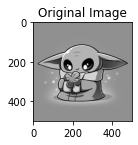

In [4]:
plt.subplot(131), plt.imshow(image, 'gray'), plt.title("Original Image")

In [5]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [6]:
lowPassCenter = center*gaussianLP(50,image.shape)
lowPass = np.fft.ifftshift(lowPassCenter)
inverseLowPass = np.fft.ifft2(lowPass)

(<AxesSubplot:title={'center':'Gaussian Low Pass'}>,
 Text(0.5, 1.0, 'Gaussian Low Pass'))

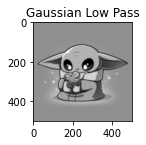

In [41]:
plt.subplot(132), plt.imshow(np.abs(inverseLowPass),'gray'), plt.title("Gaussian Low Pass")

In [31]:
highPassCenter = center*gaussianHP(50,image.shape)
highPass = np.fft.ifftshift(highPassCenter)
inverseHighPass = np.fft.ifft2(highPass)

(<AxesSubplot:title={'center':'Gaussian High Pass'}>,
 Text(0.5, 1.0, 'Gaussian High Pass'))

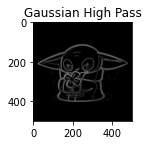

In [32]:
plt.subplot(133), plt.imshow(np.abs(inverseHighPass),'gray'), plt.title("Gaussian High Pass")

In [33]:
plt.show()

In [34]:
print(image.shape)

(500, 500)
